# 预测tap4fun游戏用户的付费金额

2018-12-16 11:40:04 


目标：使用玩家在前7日的行为数据，预测前45日付费金额。

成都尼毕鲁科技股份有限公司（tap4fun）成立于2008年，是致力于制作全球顶尖手游产品的游戏开发商，具备领先的自主研发和运营实力。 公司总部位于四川成都，在北京和香港均设有分公司，团队规模已达600余人。 公司主营业务为移动网络游戏的研发、运营及移动网络游戏领域的投资。目前已成功研发并上线的游戏有《野蛮时代》、《战地风暴》、《银河传说》、《银河帝国》、《王者帝国》、《斯巴达战争》等。 未来公司将坚持以“终身学习，创人所爱”为宗旨，应用科技力量创新游戏模式，打造更多玩家热爱的高品质手游。


In [1]:
!ls

sub_sample.csv                 tap_fun_train.csv
tap4fun数据字段解释.xlsx       tapfun_gamedata.ipynb
tap_fun_test.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import warnings
warnings.filterwarnings('ignore')
sklearn.__version__

'0.20.1'

In [3]:
intr = pd.read_excel('tap4fun数据字段解释.xlsx')
intr.head()

,字段名,字段解释,数据时间,变量性质,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,user_id,玩家唯一ID,永久,ID,目标：使用玩家在前7日的行为数据，预测玩家前45日付费金额。,NaN,NaN
1,register_time,玩家注册时间,永久,自变量,NaN,NaN,NaN
2,wood_add_value,木头获取数量,前七日,自变量,NaN,NaN,NaN
3,wood_reduce_value,木头消耗数量,前七日,自变量,NaN,NaN,NaN
4,stone_add_value,石头获取数量,前七日,自变量,NaN,NaN,NaN


In [4]:
intr.tail()

,字段名,字段解释,数据时间,变量性质,Unnamed: 4,Unnamed: 5,Unnamed: 6
104,pve_win_count,PVE胜利次数,前七日,自变量,NaN,NaN,NaN
105,avg_online_minutes,在线时长,前七日,自变量,NaN,NaN,NaN
106,pay_price,付费金额,前七日,自变量,NaN,NaN,NaN
107,pay_count,付费次数,前七日,自变量,NaN,NaN,NaN
108,prediction_pay_price,45日付费金额,前45日,因变量,NaN,NaN,NaN


In [5]:
' -- '.join(intr['字段名'].tolist())

'user_id -- register_time -- wood_add_value -- wood_reduce_value -- stone_add_value -- stone_reduce_value -- ivory_add_value -- ivory_reduce_value -- meat_add_value -- meat_reduce_value -- magic_add_value -- magic_reduce_value -- infantry_add_value -- infantry_reduce_value -- cavalry_add_value -- cavalry_reduce_value -- shaman_add_value -- shaman_reduce_value -- wound_infantry_add_value -- wound_infantry_reduce_value -- wound_cavalry_add_value -- wound_cavalry_reduce_value -- wound_shaman_add_value -- wound_shaman_reduce_value -- general_acceleration_add_value -- general_acceleration_reduce_value -- building_acceleration_add_value -- building_acceleration_reduce_value -- reaserch_acceleration_add_value -- reaserch_acceleration_reduce_value -- training_acceleration_add_value -- training_acceleration_reduce_value -- treatment_acceleraion_add_value -- treatment_acceleration_reduce_value -- bd_training_hut_level -- bd_healing_lodge_level -- bd_stronghold_level -- bd_outpost_portal_level --

这是一个手机游戏的客户数据，特征包括：
- user_id
- 注册时间
- 游戏资源（木头、石头、象牙、肉、魔法等）
- 兵种（勇士、驯兽师、萨满）
- 加速券（通用、建筑、科研、训练、治疗）
- 建筑
- 科研
- PVP（玩家对战）
- PVE（人机对战）
- 在线时长
- 付费金额
- 付费次数。

这些都是注册前7天的信息  

预测目标：前45天的付费金额.

# 读入数据

In [6]:
df = pd.read_csv('tap_fun_train.csv')
df.head()

,user_id,register_time,wood_add_value,wood_reduce_value,stone_add_value,stone_reduce_value,ivory_add_value,ivory_reduce_value,meat_add_value,meat_reduce_value,...,pvp_battle_count,pvp_lanch_count,pvp_win_count,pve_battle_count,pve_lanch_count,pve_win_count,avg_online_minutes,pay_price,pay_count,prediction_pay_price
0,1,2018-02-02 19:47:15,20125.0,3700.0,0.0,0.0,0.0,0.0,16375.0,2000.0,...,0,0,0,0,0,0,0.333333,0.0,0,0.0
1,1593,2018-01-26 00:01:05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0.333333,0.0,0,0.0
2,1594,2018-01-26 00:01:58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1.166667,0.0,0,0.0
3,1595,2018-01-26 00:02:13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,3.166667,0.0,0,0.0
4,1596,2018-01-26 00:02:46,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,2.333333,0.0,0,0.0


In [7]:
df.columns[1]

'register_time'

In [8]:
df.describe()

,user_id,wood_add_value,wood_reduce_value,stone_add_value,stone_reduce_value,ivory_add_value,ivory_reduce_value,meat_add_value,meat_reduce_value,magic_add_value,...,pvp_battle_count,pvp_lanch_count,pvp_win_count,pve_battle_count,pve_lanch_count,pve_win_count,avg_online_minutes,pay_price,pay_count,prediction_pay_price
count,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,...,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06,2.288007e+06
mean,1.529543e+06,4.543069e+05,3.698433e+05,1.897788e+05,1.376074e+05,8.075623e+04,3.613170e+04,5.855155e+05,3.548102e+05,7.538954e+04,...,2.148313e+00,1.059639e+00,9.838589e-01,2.844738e+00,2.832409e+00,2.556749e+00,1.020749e+01,5.346691e-01,5.770699e-02,1.793146e+00
std,9.399393e+05,4.958667e+06,3.737720e+06,4.670620e+06,3.370166e+06,2.220540e+06,1.782499e+06,5.868629e+06,3.400632e+06,9.662892e+05,...,1.167797e+01,9.074459e+00,8.951280e+00,1.276245e+01,1.271820e+01,1.184737e+01,3.895946e+01,2.263835e+01,7.090886e-01,8.846303e+01
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,7.499925e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.419095e+06,4.203800e+04,9.830000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.458700e+04,6.470000e+03,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.833333e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,2.299006e+06,1.531180e+05,9.855700e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.360010e+05,6.605400e+04,0.000000e+00,...,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,4.833333e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,3.190530e+06,1.239962e+09,7.995875e+08,1.214869e+09,7.962378e+08,5.744961e+08,4.481972e+08,1.470644e+09,8.889537e+08,2.637228e+08,...,2.054000e+03,2.051000e+03,1.904000e+03,5.090000e+02,5.090000e+02,4.880000e+02,2.049667e+03,7.457950e+03,1.050000e+02,3.297781e+04


In [9]:
df['register_hour'] = [int(i[11:13]) for i in df['register_time']]
register_day = pd.to_datetime([i[:10] for i in df['register_time']])
last_day = np.max(register_day)
df['register_days'] = [(last_day-i).days for i in register_day]

# 剔除数据

liu_lin 数据挖掘工程师   |   C/C++ http://www.dcjingsai.com/common/bbs/topicDetails.html?tid=2039

感谢主办方提供的这次机会，也是一直想写个分享，最近忙于数模比赛，终于现在得空，写一些分享。

我们团队使用了5个模型进行average，做的数据处理以及模型，也是针对pay_price!=0的用户，但是有个trick是将训练集预测值大于16000以上的值去除，大于16000以上的值个数就只有几个，但是对总体的rmse影响特别大，去掉前rmse是400-500，去掉以后能到200-300,还有就是要对部分变量的偏度大于0.75的做log1p变换，当然预测label也做log1p变换，总结来说，就是要利用不同模型的优势，这样子AB榜才不会翻车。印象深刻的是其中之一的nn模型能够对B榜造成很大的影响（对于nn来说，训练集是对数据去重去躁以后的结果，不是单单取出pay_price！=0的用户，预测的还是Pay_price！=0的用户）

具体代码参考github链接   挖矿中代码链接 https://github.com/oh-it-is/wankuangzhong/tree/master/%E7%8E%A9%E5%AE%B6%E4%BB%98%E8%B4%B9%E9%87%91%E9%A2%9D%E9%A2%84%E6%B5%8B%2B1%2B%E6%8C%96%E7%9F%BF%E4%B8%AD

In [78]:
df['zero_pay_price'] = [i==0 for i in df['pay_price']]
df['zero_wood_add_value'] = [i==0 for i in df['wood_add_value']]
df['zero_prediction_pay_price'] = [i==0 for i in df['prediction_pay_price']]

In [77]:
df.groupby(['zero_pay_price', 'zero_prediction_pay_price'])['pay_price'].count()

zero_pay_price  zero_prediction_pay_price
False           False                          41439
True            False                           4549
                True                         2242019
Name: pay_price, dtype: int64

In [81]:
4549/(2242019+4549) 

0.002024866373953515

<font size = '5pt' color = 'red'> 七天内的pay_price为0的用户继续付费概率仅有0.2%，基本上不会在未来45天继续付费（概率高达99.8%）。</font>

In [83]:
df.groupby(['zero_wood_add_value', 'zero_prediction_pay_price'])['pay_price'].count()

zero_wood_add_value  zero_prediction_pay_price
False                False                          43443
                     True                         1608939
True                 False                           2545
                     True                          633080
Name: pay_price, dtype: int64

In [67]:
#age = pd.cut(titanic['age'], [0, 18, 80])
df.pivot_table('avg_online_minutes', ['zero_pay_price', 'zero_wood_add_value'], 'zero_prediction_pay_price')

zero_prediction_pay_price                False     True 
zero_pay_price zero_wood_add_value                      
False          False                146.565307       NaN
               True                  33.091813       NaN
True           False                120.979075  9.700489
               True                   5.081790  2.231587

In [68]:
df.pivot_table('avg_online_minutes', ['zero_pay_price'], 'zero_prediction_pay_price')

zero_prediction_pay_price,False,True
zero_pay_price,,
False,140.187746,NaN
True,115.475929,7.591491


In [53]:
for k, i in enumerate(df.iloc[0]):
    if i != 0:
        print(i, df.columns[k])

1 ﻿user_id
2018-02-02 19:47:15 register_time
20125.0 wood_add_value
3700.0 wood_reduce_value
16375.0 meat_add_value
2000.0 meat_reduce_value
50 reaserch_acceleration_add_value
50 training_acceleration_add_value
1 bd_stronghold_level
1 bd_barrack_level
0.333333 avg_online_minutes
19 register_hour
32 register_days


In [59]:
for k, i in enumerate(df.iloc[1]):
    if i != 0:
        print(i, df.columns[k])

1593 ﻿user_id
2018-01-26 00:01:05 register_time
0.333333 avg_online_minutes
39 register_days


In [60]:
for k, i in enumerate(df.iloc[2]):
    if i != 0:
        print(i, df.columns[k])

1594 ﻿user_id
2018-01-26 00:01:58 register_time
1.166667 avg_online_minutes
39 register_days


In [7]:
df

RangeIndex(start=0, stop=3, step=1)

In [23]:
df.columns

Index(['﻿user_id', 'register_time', 'wood_add_value', 'wood_reduce_value',
       'stone_add_value', 'stone_reduce_value', 'ivory_add_value',
       'ivory_reduce_value', 'meat_add_value', 'meat_reduce_value',
       ...
       'pvp_win_count', 'pve_battle_count', 'pve_lanch_count', 'pve_win_count',
       'avg_online_minutes', 'pay_price', 'pay_count', 'prediction_pay_price',
       'register_hour', 'register_days'],
      dtype='object', length=111)

In [25]:
df.shape

(2288007, 111)

In [26]:
df = df.dropna()

In [28]:
df.shape

(2288007, 111)

In [84]:
df = pd.read_csv('tap_fun_train.csv')
df = df[df['pay_price'] !=0]
df.shape

(41439, 114)

# 数据描述

In [10]:
df = pd.read_csv('tap_fun_train.csv')
df = df[df['pay_price'] !=0]
df.shape

(41439, 109)

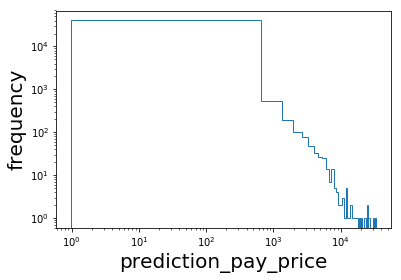

In [85]:
plt.hist(df['prediction_pay_price'], bins = 50, histtype = 'step')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('prediction_pay_price', fontsize = 20)
plt.ylabel('frequency', fontsize = 20)
plt.show()

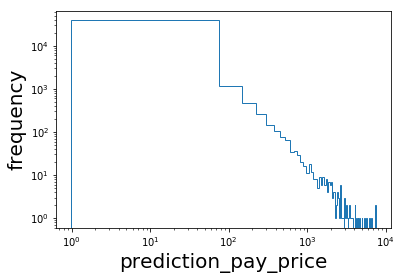

In [90]:
plt.hist(df['pay_price'], bins = 100, histtype = 'step')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('prediction_pay_price', fontsize = 20)
plt.ylabel('frequency', fontsize = 20)
plt.show()

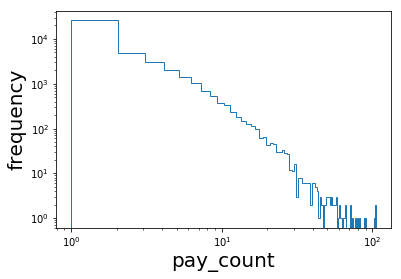

In [89]:
plt.hist(df['pay_count'], bins = 100, histtype = 'step')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('pay_count', fontsize = 20)
plt.ylabel('frequency', fontsize = 20)
plt.show()

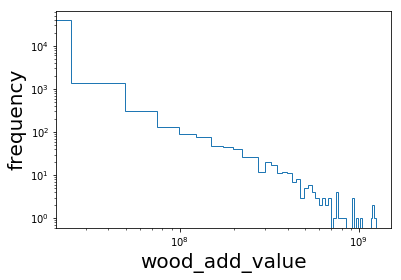

In [91]:
plt.hist(df['wood_add_value'], bins = 50, histtype = 'step')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('wood_add_value', fontsize = 20)
plt.ylabel('frequency', fontsize = 20)
plt.show()

In [32]:
?plt.hist

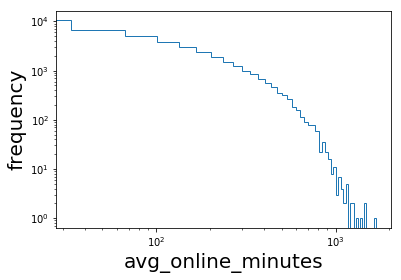

In [92]:
plt.hist(df['avg_online_minutes'], bins = 50, histtype = 'step')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('avg_online_minutes', fontsize = 20)
plt.ylabel('frequency', fontsize = 20)
plt.show()

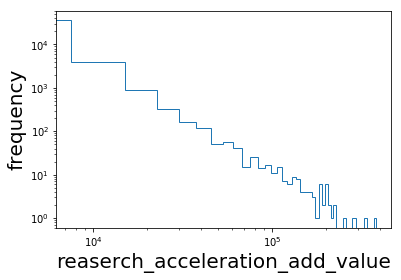

In [93]:
plt.hist(df['reaserch_acceleration_add_value'], bins = 50, histtype = 'step')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('reaserch_acceleration_add_value', fontsize = 20)
plt.ylabel('frequency', fontsize = 20)
plt.show()

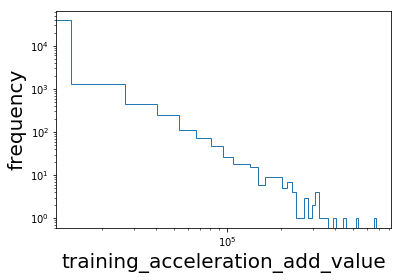

In [94]:
plt.hist(df['training_acceleration_add_value'], bins = 50, histtype = 'step')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('training_acceleration_add_value', fontsize = 20)
plt.ylabel('frequency', fontsize = 20)
plt.show()

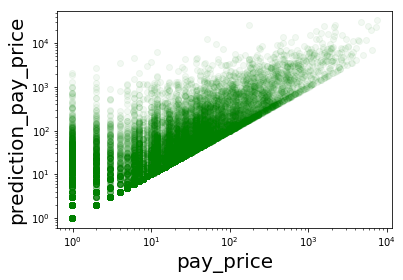

In [95]:
plt.plot(df['pay_price'], df['prediction_pay_price'], 'go', alpha = 0.05)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('pay_price', fontsize = 20)
plt.ylabel('prediction_pay_price', fontsize = 20)
plt.show()

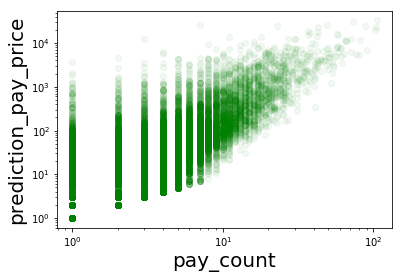

In [96]:
plt.plot(df['pay_count'], df['prediction_pay_price'], 'go', alpha = 0.05)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('pay_count', fontsize = 20)
plt.ylabel('prediction_pay_price', fontsize = 20)
plt.show()

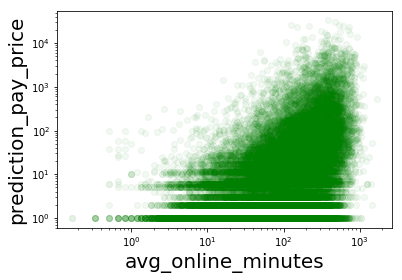

In [97]:
plt.plot(df['avg_online_minutes'], df['prediction_pay_price'], 'go', alpha = 0.05)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('avg_online_minutes', fontsize = 20)
plt.ylabel('prediction_pay_price', fontsize = 20)
plt.show()

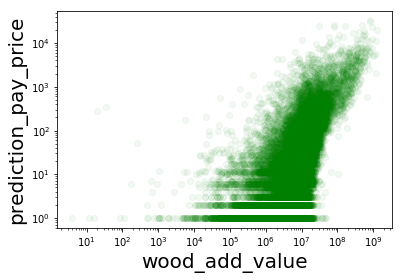

In [98]:
plt.plot(df['wood_add_value'], df['prediction_pay_price'], 'go', alpha = 0.05)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('wood_add_value', fontsize = 20)
plt.ylabel('prediction_pay_price', fontsize = 20)
plt.show()

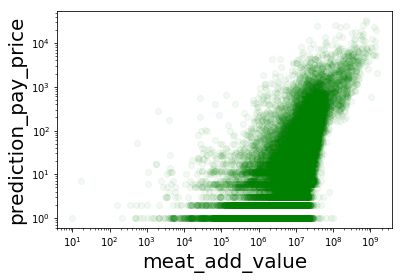

In [99]:
plt.plot(df['meat_add_value'], df['prediction_pay_price'], 'go', alpha = 0.05)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('meat_add_value', fontsize = 20)
plt.ylabel('prediction_pay_price', fontsize = 20)
plt.show()

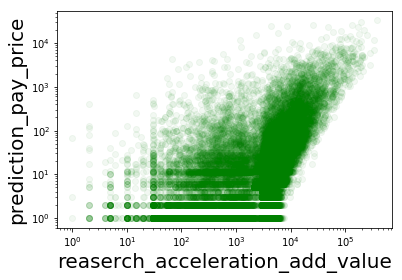

In [100]:
plt.plot(df['reaserch_acceleration_add_value'], df['prediction_pay_price'], 'go', alpha = 0.05)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('reaserch_acceleration_add_value', fontsize = 20)
plt.ylabel('prediction_pay_price', fontsize = 20)
plt.show()

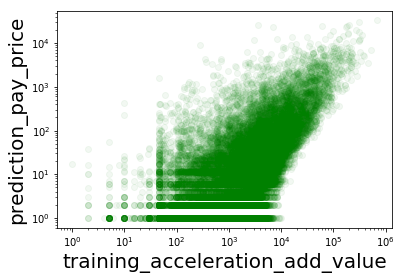

In [101]:
plt.plot(df['training_acceleration_add_value'], df['prediction_pay_price'], 'go', alpha = 0.05)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('training_acceleration_add_value', fontsize = 20)
plt.ylabel('prediction_pay_price', fontsize = 20)
plt.show()

## PVP胜率

person vs person

In [13]:
print(*df.columns)

user_id register_time wood_add_value wood_reduce_value stone_add_value stone_reduce_value ivory_add_value ivory_reduce_value meat_add_value meat_reduce_value magic_add_value magic_reduce_value infantry_add_value infantry_reduce_value cavalry_add_value cavalry_reduce_value shaman_add_value shaman_reduce_value wound_infantry_add_value wound_infantry_reduce_value wound_cavalry_add_value wound_cavalry_reduce_value wound_shaman_add_value wound_shaman_reduce_value general_acceleration_add_value general_acceleration_reduce_value building_acceleration_add_value building_acceleration_reduce_value reaserch_acceleration_add_value reaserch_acceleration_reduce_value training_acceleration_add_value training_acceleration_reduce_value treatment_acceleraion_add_value treatment_acceleration_reduce_value bd_training_hut_level bd_healing_lodge_level bd_stronghold_level bd_outpost_portal_level bd_barrack_level bd_healing_spring_level bd_dolmen_level bd_guest_cavern_level bd_warehouse_level bd_watchtower_le

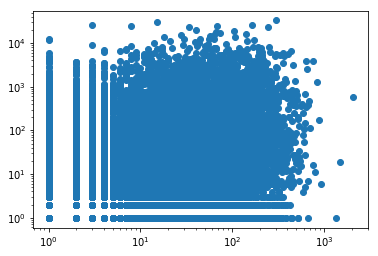

In [18]:
plt.scatter(df['pvp_battle_count']+1, df['prediction_pay_price'])
plt.xscale('log')
plt.yscale('log')
plt.show()

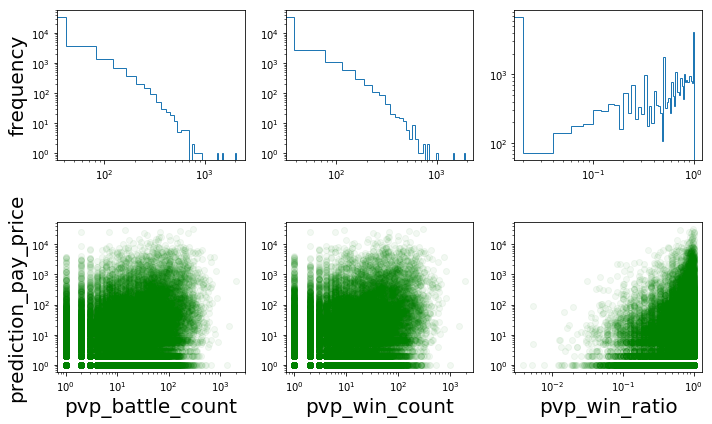

In [38]:
plt.figure(figsize= (10, 6))
plt.subplot(231)
plt.hist(df['pvp_battle_count'], bins = 50, histtype = 'step')
plt.xscale('log')
plt.yscale('log')
#plt.xlabel('pvp_battle_count', fontsize = 20)
plt.ylabel('frequency', fontsize = 20)
plt.subplot(232)
plt.hist(df['pvp_win_count'], bins = 50, histtype = 'step')
plt.xscale('log')
plt.yscale('log')
#plt.xlabel('pvp_win_count', fontsize = 20)
#plt.ylabel('frequency', fontsize = 20)
plt.subplot(233)
plt.hist(df['pvp_win_count']/df['pvp_battle_count'], bins = 50, histtype = 'step')
plt.xscale('log')
plt.yscale('log')
#plt.xlabel('pvp_win_ratio', fontsize = 20)
#plt.ylabel('frequency', fontsize = 20)
plt.subplot(234)
plt.plot(df['pvp_battle_count'], df['prediction_pay_price'], 'go', alpha = 0.05)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('pvp_battle_count', fontsize = 20)
plt.ylabel('prediction_pay_price', fontsize = 20)
plt.subplot(235)
plt.plot(df['pvp_win_count'], df['prediction_pay_price'], 'go', alpha = 0.05)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('pvp_win_count', fontsize = 20)
plt.subplot(236)
plt.plot(df['pvp_win_count']/df['pvp_battle_count'], df['prediction_pay_price'], 'go', alpha = 0.05)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('pvp_win_ratio', fontsize = 20)
plt.tight_layout()
plt.show()

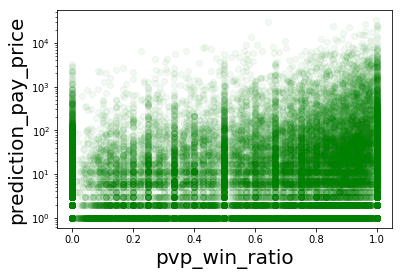

In [34]:
plt.plot(df['pvp_win_count']/df['pvp_battle_count'],
         df['prediction_pay_price'], 'go', alpha = 0.05)
#plt.xscale('log')
plt.yscale('log')
plt.xlabel('pvp_win_ratio', fontsize = 20)
plt.ylabel('prediction_pay_price', fontsize = 20)
plt.show()

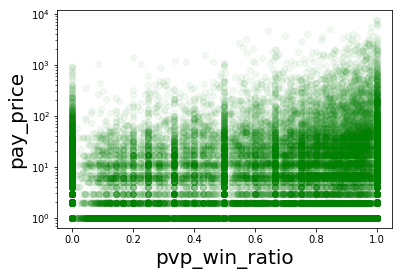

In [35]:
plt.plot(df['pvp_win_count']/df['pvp_battle_count'],
         df['pay_price'], 'go', alpha = 0.05)
#plt.xscale('log')
plt.yscale('log')
plt.xlabel('pvp_win_ratio', fontsize = 20)
plt.ylabel('pay_price', fontsize = 20)
plt.show()

# 机器学习

http://www.dcjingsai.com/common/bbs/topicDetails.html?tid=1671

https://github.com/oh-it-is/wankuangzhong/

In [241]:
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.model_selection import cross_val_score

def rmsel(y_true,y_pre):
    return mean_squared_error(y_true,y_pre)**0.5

## 读取数据

In [187]:
df = pd.read_csv('tap_fun_train.csv')
df['register_hour'] = [int(i[11:13]) for i in df['register_time']]
df = df[df['pay_price'] !=0]
df.shape

(41439, 110)

In [188]:
df.head()

,﻿user_id,register_time,wood_add_value,wood_reduce_value,stone_add_value,stone_reduce_value,ivory_add_value,ivory_reduce_value,meat_add_value,meat_reduce_value,...,pvp_lanch_count,pvp_win_count,pve_battle_count,pve_lanch_count,pve_win_count,avg_online_minutes,pay_price,pay_count,prediction_pay_price,register_hour
25,1617,2018-01-26 00:23:42,30000.0,97200.0,20000.0,0.0,0.0,0.0,160500.0,80392.0,...,0,0,0,0,0,44.666667,0.99,1,0.99,0
40,1632,2018-01-26 00:32:43,1111744.0,1137687.0,491331.0,790208.0,77000.0,0.0,1457249.0,708483.0,...,1,1,6,6,6,199.333333,2.97,3,4.96,0
47,1639,2018-01-26 00:40:38,249050.0,173248.0,70841.0,117012.0,55000.0,0.0,206366.0,82205.0,...,0,0,0,0,0,109.333333,12.97,3,12.97,0
86,1678,2018-01-26 01:11:11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,127.833333,0.99,1,0.99,1
119,1711,2018-01-26 01:47:42,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,203.166667,0.99,1,0.99,1


## 数据表征

In [293]:
X = df.drop(['prediction_pay_price', 'register_time'], axis = 1) #.values.astype(np.float32)
y = np.asarray(df['prediction_pay_price'], dtype=np.float64) # dtype="|S9")
#y = df['prediction_pay_price'].astype('float')

https://stackoverflow.com/questions/20722986/multinomialnb-error-unknown-label-type

In [294]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=1, train_size = 0.8)

In [295]:
Xtrain.shape, Xtest.shape, X.shape

((33151, 108), (8288, 108), (41439, 108))

## Naive Bayes

In [297]:
from sklearn.naive_bayes import GaussianNB
# Classifiers need integer or string labels.
model = GaussianNB()
model.fit(Xtrain, ytrain.astype(int))
y_model = model.predict(Xtest)

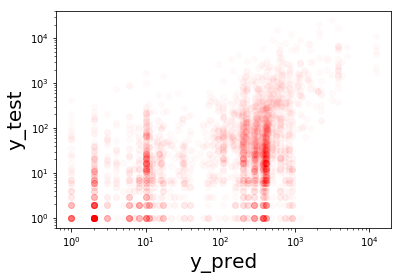

In [289]:
plt.plot(y_model, ytest, 'ro', alpha = 0.02)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('y_pred', fontsize = 20)
plt.ylabel('y_test', fontsize = 20)
plt.show()

In [290]:
print(ytest.dtype, y_model.dtype)

float64 int64


https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter


In [291]:
y_model = y_model.astype('int')
ytest = ytest.astype('int')
# model evaluation
# https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
rmse = rmsel(ytest, y_model)
print('RMSE:', rmse)
# Explained variance score: 1 is perfect prediction
print('R2 score: %.2f' % r2_score(ytest, y_model))
print('Variance score: %.2f' % explained_variance_score(ytest, y_model))

RMSE: 607.825093057
R2 score: 0.18
Variance score: 0.18


In [277]:
#y = df['prediction_pay_price'].values.astype(np.float32)
y = y.astype('int')
def r2_cv(model):
    r2= cross_val_score(model, X, y, scoring="r2", cv = 5)
    return r2

r2_cv(model)

array([ 0.26876694,  0.41982237,  0.34753402,  0.36624759,  0.39380973])

In [302]:
y = df['prediction_pay_price'].astype('int')

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)
rmse_cv(model)

array([ 1249.41437542,   305.16916333,   239.97529194,   238.31954339,
         244.17208879])

In [309]:
y = df['prediction_pay_price'].astype('int')

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X, y, scoring="explained_variance", cv = 5))
    return(rmse)
rmse_cv(model)

array([        nan,  0.40223734,  1.81809798,  2.895413  ,  3.86059468])

In [306]:
y = df['prediction_pay_price']
y = np.log1p(y)
def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X, y.astype('int'), scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

rmse_cv(model)

array([ 1.51017613,  1.34388666,  1.42517827,  1.40277474,  1.37082627])

## Random Forest Regressor

In [310]:
X = df.drop(['prediction_pay_price', 'register_time'], axis = 1) #.values.astype(np.float32)
y = np.asarray(df['prediction_pay_price'], dtype=np.float64) # dtype="|S9"

In [311]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=1, train_size = 0.8)

In [312]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators = 200)
forest.fit(Xtrain, ytrain)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [313]:
ypred = forest.predict(Xtest)

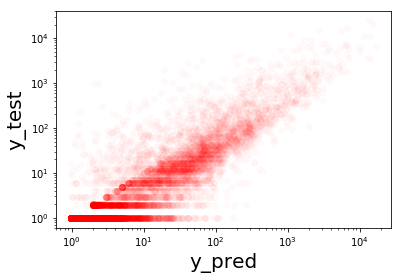

In [314]:
plt.plot(ypred, ytest, 'ro', alpha = 0.02)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('y_pred', fontsize = 20)
plt.ylabel('y_test', fontsize = 20)
plt.show()

In [315]:
rmse = rmsel(ytest, ypred)
print('RMSE:', rmse)
# Explained variance score: 1 is perfect prediction
print('R2 score: %.2f' % r2_score(ytest, ypred))
print('Variance score: %.2f' % explained_variance_score(ytest, ypred))

RMSE: 459.779998006
R2 score: 0.53
Variance score: 0.53
